In [5]:
import os
import networkx as nx
import pandas as pd

In [8]:
dfs = []
for fn in os.listdir('coutries_players'):
    if '.DS' not in fn:
        dfs.append(pd.read_csv('coutries_players/' + fn, index_col = 0))
        
dfs = pd.concat(dfs)
dfs

,tm-shirt-number,url,name,current-team,market-value,country
0,23,https://www.transfermarkt.com/ivica-ivusic/mar...,Ivica Ivusic,NK Osijek,€5.00m,Croatia
1,20,https://www.transfermarkt.com/josko-gvardiol/m...,Josko Gvardiol,RB Leipzig,€60.00m,Croatia
2,5,https://www.transfermarkt.com/martin-erlic/mar...,Martin Erlic,US Sassuolo,€5.50m,Croatia
3,21,https://www.transfermarkt.com/domagoj-vida/mar...,Domagoj Vida,AEK Athens,€2.00m,Croatia
4,3,https://www.transfermarkt.com/borna-barisic/ma...,Borna Barisic,Rangers FC,€6.50m,Croatia
...,...,...,...,...,...,...
21,13,https://www.transfermarkt.com/youssouf-fofana/...,Youssouf Fofana,AS Monaco,€25.00m,France
22,11,https://www.transfermarkt.com/ousmane-dembele/...,Ousmane Dembélé,FC Barcelona,€60.00m,France
23,7,https://www.transfermarkt.com/antoine-griezman...,Antoine Griezmann,Atlético de Madrid,€25.00m,France
24,19,https://www.transfermarkt.com/karim-benzema/ma...,Karim Benzema,Real Madrid,€35.00m,France


In [15]:
names_clubs = dfs.set_index('name').to_dict()['current-team']
names_countries = dfs.set_index('name').to_dict()['country']

G = nx.Graph()
for n1, c1 in names_clubs.items():
    for n2, c2 in names_clubs.items():
        if n1 != n2:
            weight = 0
            if c1 == c2:
                weight += 1
            if names_countries[n1] == names_countries[n2]:
                weight += 1
            if weight>0:
                G.add_edge(n1, n2, weight = weight)
                
G.number_of_nodes(), G.number_of_edges()

(830, 11810)

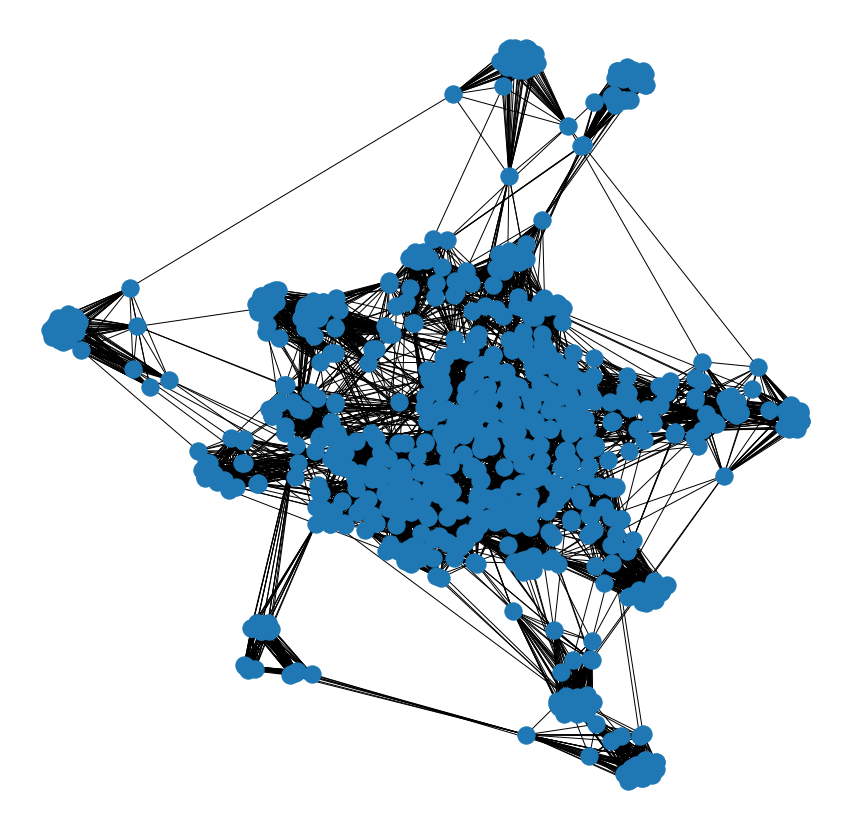

In [18]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,figsize=(15,15))
nx.draw(G, ax = ax)
nx.write_gexf(G, 'wc2022.gexf')